# January 24 Computer Lab!
## Finn O'Connor


The main goal of today is to learn about the remaining code toolset you'll need for your final projects.

Last week, we went over:
- Adjacency matrices 
- using `numpy`
- importing network data
- using [`networkx`](https://networkx.org) to visualize networks

This week, we'll go over: 
* Figuring out the number of edges in your network
* Determining if your graph is directed or not
* Metadata on node attributes
* Datasets in `networkx`
* Centrality metrics
* Hubs and Authorities
* Clustering coefficient
* Path length
* Degree distributions
* Connectivity
* Graph Partitioning
* Plotting node communities/partitions

The first part of today will be more self-guided so that you can practice the correct syntax of what we learned last week. If you're not sure how to do something, you can check out our CL from last week or ask me. 

Once we get to new material, we'll go through it together, and then you'll have another opportunity to practice the new skills.

## TODO: Import the packages we'll use
If you're not sure, check out our computer lab from last week

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## TODO: Import today's network data

The network we'll be looking at today is the friendship network of a 1980's tech firm, as perceived by the firm's president.
Import this network as a numpy array named `Tech_Friends`. The network is saved in the file `krackhardt_prez.npy`. 

In [12]:
folder = ""
file = "krackhardt_prez"
ext = ".npy"
Tech_Friends = np.load( folder+file+ext )


## TODO: Plot the network
Remember that in order to plot the network, you need to 
* Make a graph object (this graph is directed!)
    * Name the graph object `Tech_Friends_G`
* Determine the positions of the nodes in the network
* Draw the graph 

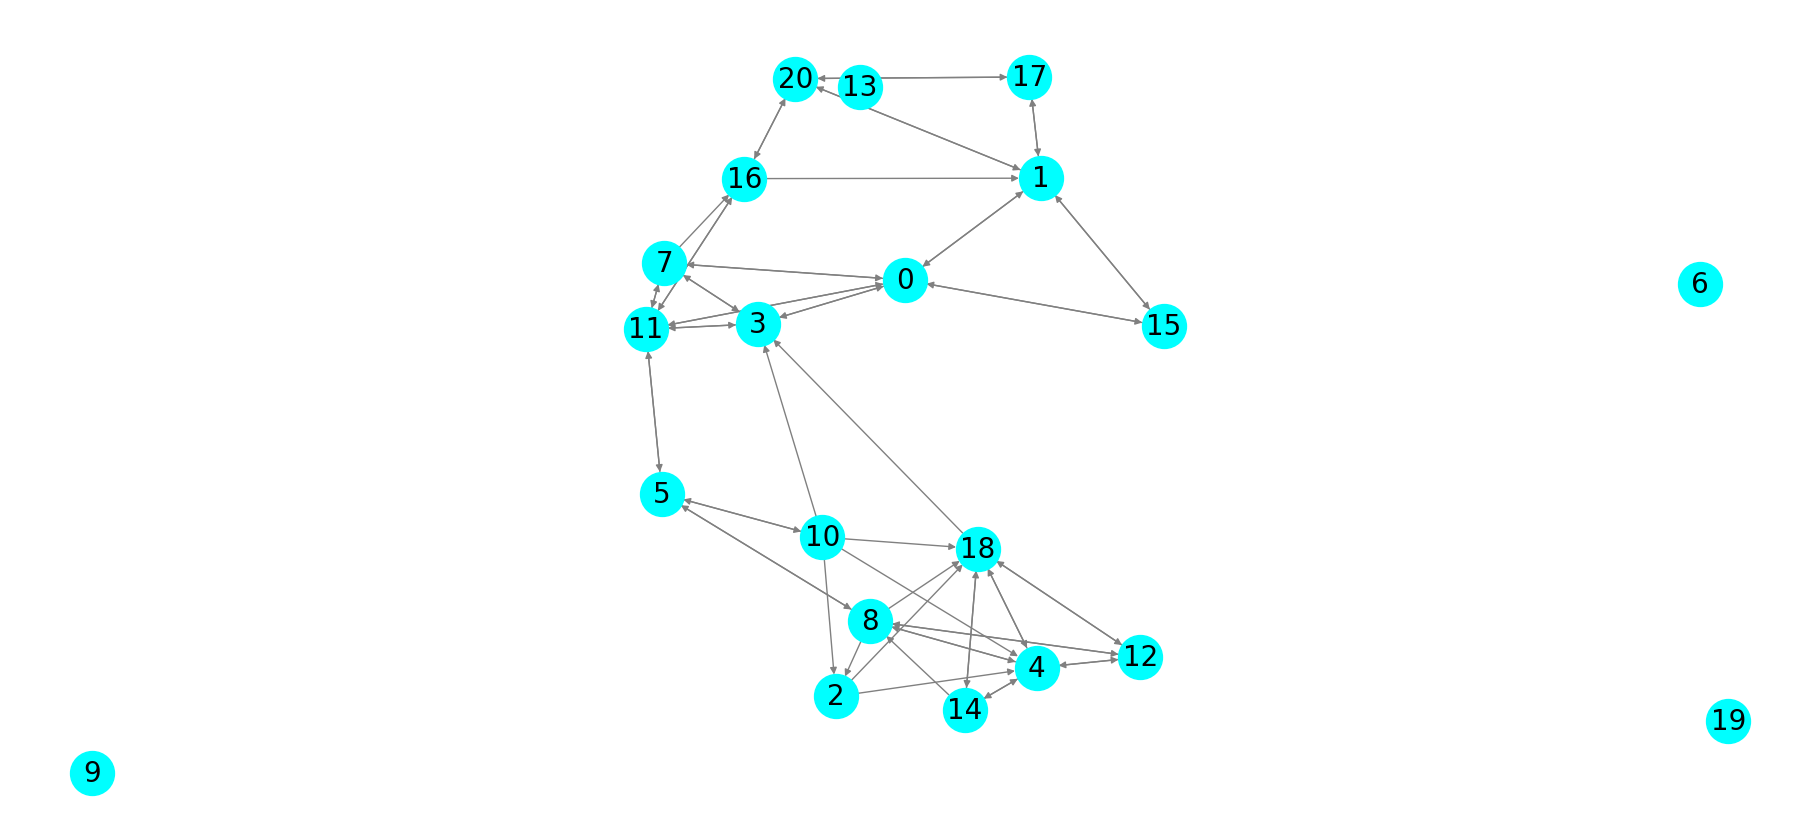

In [44]:
Tech_Friends_G = nx.to_networkx_graph(Tech_Friends, create_using=nx.DiGraph)




pos = nx.spring_layout(Tech_Friends_G, k=0.5)

plt.figure(figsize = (18,8) )
nx.draw(Tech_Friends_G, pos, node_color='cyan', node_size=1000, edge_color='grey', with_labels=True, font_size = 20)


## Basic network attributes
Above I wrote that our network was directed, but another way you could check is to see if the network's adjacency matrix is the same as its _transpose_. Remember, the _transpose_ of a matrix is what you get when you think of all of the columns as rows, and all of the rows as columns:

In [18]:
A = np.array([[0, 0, 1], [1, 0, 1], [0, 1, 1]])
print(A)
print()
print(A.T)

[[0 0 1]
 [1 0 1]
 [0 1 1]]

[[0 1 0]
 [0 0 1]
 [1 1 1]]


In the small example above, we can _see_ that different matrices were printed when we compared the matrix with its transpose. This can be harder with bigger datasets. Another way to check is using `numpy`'s `all_close` function, which checks each entry of the two matrices it's asked to compare.

In [19]:
np.allclose(A, A.T)

False

If this function returns `True`, it means that the matrix and its _transpose_ are the same, and therefore, that the network is undirected. If this function returns `False`, it means that the matrix and its transpose are **not** the same, and therefore, that the network is directed. 

## TODO: How many nodes are there in our network?
Use the adjacency matrix and a function we learned last week to print how many nodes/people there are in our friendship network. Save the number of nodes as the variable `N`.

In [22]:
N = np.shape(Tech_Friends)[0]
print(N)

21


# How many edges?

Something else we might want to do is find out how many _edges_ there are in a network. There are two ways we could do this, one using the adjacency matrix, and one using `networkx`. 

To think about how we can use the adjacency matrix, think about how (unweighted) edges are represented. If there is an edge between nodes $i$ and $j$ in the network, then the `[i,j]` entry of the adjacency matrix is equal to 1. In an _undirected_ network, if there is an edge between $i$ and $j$, then not only will `A[i,j]= 1`, but `A[j, i]=1` as well. This means that for one edge, the adjacency matrix has _two_ `1` values. In a directed network, however, each edge will only correspond to _one_ `1` in the adjacency matrix. 

This gives us our first approach to determining the number of edges in a network, which is to _sum_ up all the values in the adjacency matrix. If there's no edge, then the corresponding `0` won't contribute to the sum, but if there is, we will add `1` for each edge! If we have an undirected network, we'll divide by 2 at the end.

In [23]:
np.sum(np.sum(Tech_Friends, axis = 0))

60.0

If we want to check this, or if we already have our network saved as a `networkx` graph object, we can check 

In [24]:
print(Tech_Friends_G.number_of_edges())

60


## Metadata

Sometimes we'll have _metadata_ about the nodes in our network. This could be anything from the person's self-identified nationality to the [upstream promoter regions (UPS) of a genetic sequence](https://drive.google.com/open?id=1Kwhpl2djID0584KvzjaA8mIzcLdtdmzq).

For the case of our `Tech_Friends` network, we have metadata about each node's Age, Department, Level, and Tenure at the company. Each of these are stored in the files `Age.npy`, `Dept.npy`, `Level.npy`, and `Tenure.npy`, respectively. 

Metadata can be helpful in corroborating our findings after doing analysis on a network. For example, what can we say if we know the age of our most central node? For now, let's just print the number of years each node in our  network has been at the company.

In [28]:
Tenure = np.load('Tenure.npy')
for i in range(N):
    print('Person {} has been in the company for {} years'.format(i, Tenure[i]))

Person 0 has been in the company for 9.333 years
Person 1 has been in the company for 19.583 years
Person 2 has been in the company for 12.75 years
Person 3 has been in the company for 7.5 years
Person 4 has been in the company for 3.333 years
Person 5 has been in the company for 28.0 years
Person 6 has been in the company for 30.0 years
Person 7 has been in the company for 11.333 years
Person 8 has been in the company for 5.417 years
Person 9 has been in the company for 9.25 years
Person 10 has been in the company for 27.0 years
Person 11 has been in the company for 8.917 years
Person 12 has been in the company for 0.25 years
Person 13 has been in the company for 10.417 years
Person 14 has been in the company for 8.417 years
Person 15 has been in the company for 4.667 years
Person 16 has been in the company for 12.417 years
Person 17 has been in the company for 9.083 years
Person 18 has been in the company for 4.833 years
Person 19 has been in the company for 11.667 years
Person 20 ha

We'll see how to use the other metadata later.

# Datasets in `networkx`
The package `networkx` has [some datasets](https://networkx.org/documentation/stable/auto_examples/graph/index.html) already saved as graph objects. For example, the Karate Club that we talked about in the first week of class is already saved for us! Let's load it.

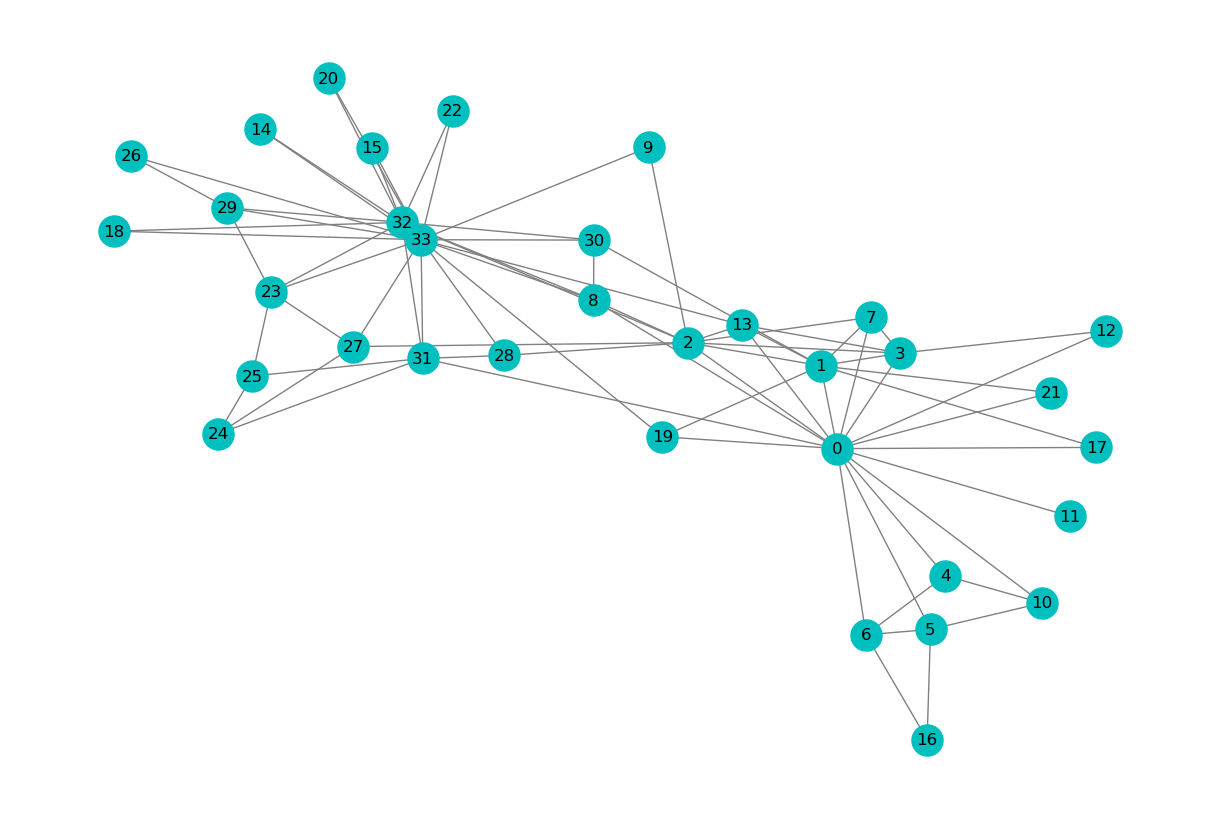

In [3]:
Karate = nx.karate_club_graph()
plt.figure(figsize = (12,8))
k_pos = nx.spring_layout(Karate, k=0.05)
nx.draw(Karate, k_pos, node_color='c', node_size=500, edge_color='grey', with_labels=True)

## TODO: How many edges are in this network?

In [5]:
print(Karate.number_of_edges())

78


## Metadata in `networkx`
The Karate Club network has also saved node attributes using `networkx`. 

In [27]:
for node in Karate.nodes():
    print('node', node, 'is in ', Karate.nodes[node]['club'],'`s', 'club')

node 0 is in  Mr. Hi `s club
node 1 is in  Mr. Hi `s club
node 2 is in  Mr. Hi `s club
node 3 is in  Mr. Hi `s club
node 4 is in  Mr. Hi `s club
node 5 is in  Mr. Hi `s club
node 6 is in  Mr. Hi `s club
node 7 is in  Mr. Hi `s club
node 8 is in  Mr. Hi `s club
node 9 is in  Officer `s club
node 10 is in  Mr. Hi `s club
node 11 is in  Mr. Hi `s club
node 12 is in  Mr. Hi `s club
node 13 is in  Mr. Hi `s club
node 14 is in  Officer `s club
node 15 is in  Officer `s club
node 16 is in  Mr. Hi `s club
node 17 is in  Mr. Hi `s club
node 18 is in  Officer `s club
node 19 is in  Mr. Hi `s club
node 20 is in  Officer `s club
node 21 is in  Mr. Hi `s club
node 22 is in  Officer `s club
node 23 is in  Officer `s club
node 24 is in  Officer `s club
node 25 is in  Officer `s club
node 26 is in  Officer `s club
node 27 is in  Officer `s club
node 28 is in  Officer `s club
node 29 is in  Officer `s club
node 30 is in  Officer `s club
node 31 is in  Officer `s club
node 32 is in  Officer `s club
node

Looking at how `networkx` has saved each node's club membership gives us a new way to store each node's metadata. 

In [26]:
Level = np.load('Level.npy')
Dept = np.load('Dept.npy')
Age = np.load('Age.npy')

for node in Tech_Friends_G.nodes(): # loop over all the nodes
    Tech_Friends_G.nodes[node]['Level'] = Level[node]
    Tech_Friends_G.nodes[node]['Tenure'] = Tenure[node]
    Tech_Friends_G.nodes[node]['Department'] = Dept[node]
    Tech_Friends_G.nodes[node]['Age'] = Age[node]

for node in Tech_Friends_G.nodes():
    print('node ', node, 'is ', Tech_Friends_G.nodes[node]['Age'], ' years old.')

node  0 is  33  years old.
node  1 is  42  years old.
node  2 is  40  years old.
node  3 is  33  years old.
node  4 is  32  years old.
node  5 is  59  years old.
node  6 is  55  years old.
node  7 is  34  years old.
node  8 is  62  years old.
node  9 is  37  years old.
node  10 is  46  years old.
node  11 is  34  years old.
node  12 is  48  years old.
node  13 is  43  years old.
node  14 is  40  years old.
node  15 is  27  years old.
node  16 is  30  years old.
node  17 is  33  years old.
node  18 is  32  years old.
node  19 is  38  years old.
node  20 is  36  years old.


## Centrality in `networkx`
The four centrality metrics we've gone over in class (degree, closeness, betweenness, and eigenvector centrality) are all already coded up for us in `networkx`. To use them, we just have to use the functions `nx.TYPE_centrality(G)` where we replace `TYPE` with either `degree`, `eigenvector`, `closeness`, or `betweenness`, and replace `G` with the name of our network object.

In [6]:
a = nx.degree_centrality(Karate)
d = nx.closeness_centrality(Karate)
b = nx.eigenvector_centrality(Karate)
c = nx.betweenness_centrality(Karate)

print('The person with highest degree centrality is', max(a, key=lambda key: a[key]))
print('The person with highest closeness centrality is', max(d, key=lambda key: d[key]))
print('The person with highest eigenvector centrality is', max(b, key=lambda key: b[key]))
print('The person with highest betweenness centrality is', max(c, key=lambda key: c[key]))

The person with highest degree centrality is 33
The person with highest closeness centrality is 0
The person with highest eigenvector centrality is 33
The person with highest betweenness centrality is 0


## Graph partitioning
We'll use `networkx`'s Girvan-Newman algorithm to find the community structure in the Karate network. The object that the function returns is kind of tricky, so we'll have some helper-code to store it in an easier format.

In [10]:
#from networkx.algorithms.communities import girvan_newman

comm = nx.algorithms.community.girvan_newman(Karate)
gn_communities = tuple(sorted(c) for c in next(comm))

I've written some more helper-code for _plotting_ the  communities in our network.

In [8]:
import matplotlib.cm as cmx
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=300, edge_color='grey', with_labels=True)
    plt.show()
    return

With this helper-code, all we have to do is call `Plot_Comm(G, comm, pos)` to plot the communities in our network with different colours. `G` is our `networkx` graph object, `comm` is the re-formatted communities object, and `pos` is the position we want to plot the nodes in. Specifying `pos` is optional, if you leave it blank, new positions will be determined.

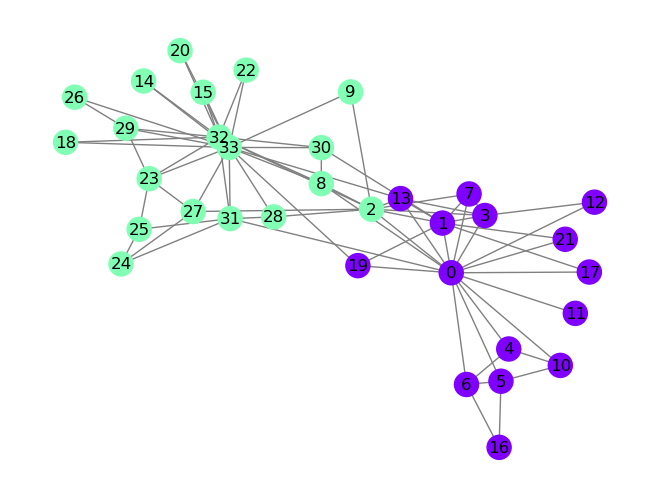

In [11]:
Plot_Comm(Karate, gn_communities, k_pos)

In this network, there is a _ground truth_ for the community structure, and we can use the node's metadata to check how our graph partitioning did.

In [ ]:
print(Karate.nodes[33]['club'])
print(Karate.nodes[28]['club'])
print(Karate.nodes[0]['club'])
print(Karate.nodes[8]['club'])
print(Karate.nodes[2]['club'])

## Clustering coefficient
Recall that the clustering coefficient of a node tells us the probability that any pair of its friends are friends with one another. `networkx` can tell us the clustering coefficient of each node, as well as the average clustering coefficient in the network:

In [29]:
clustering = nx.algorithms.clustering(Karate)
print('The node with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

average_cc = nx.algorithms.average_clustering(Karate)
print('The average clustering coefficient for the Karate network is ', average_cc)

The node with lowest clustering coefficient is 9
The average clustering coefficient for the Karate network is  0.5706384782076823


## Degree distribution
The following code plots a histogram of the _degree distribution_ of our network. Each "bin" tells us the number of degrees and the height of the bar tells us how many nodes have the same degree.

<BarContainer object of 11 artists>

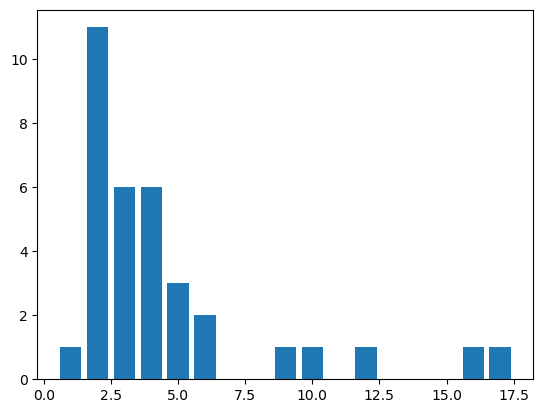

In [30]:
degree_sequence = sorted((d for n, d in Karate.degree()), reverse=True)
plt.bar(*np.unique(degree_sequence, return_counts=True))

## Connectedness
To find out if our network is connected, and to find out how many connected components there are if it's not, we can use the following code:

In [31]:
print(nx.is_connected(Karate))
print(nx.node_connected_component(Karate, 0))
print(nx.number_connected_components(Karate))

True
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}
1


In directed graphs, we can use the functions `nx.number_strongly_connected_components(G)` and `nx.is_strongly_connected(G)`.

## Shortest path
This function tells us the average of all the shortest paths in the network. You can also find the shortest path(s) for all the nodes in the network using [`shortest_path`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path).

In [32]:
print(nx.average_shortest_path_length(Karate))

2.408199643493761


## PageRank and Hubs and Authorities
As we talked about yesterday, PageRank and Hubs and Authorities can be used meaningfully for things like citation networks (or lots of other networks!). Our Karate network isn't directed, so these results aren't particularly meaningful, but I wanted to put down the syntax here so you can use them for a directed network.

In [33]:
PR = nx.pagerank(Karate)
H, A = nx.hits(Karate)
print('The node with highest PageRank is', max(PR, key=lambda key: PR[key]))
print('The node with highest Hub Score is', max(H, key=lambda key: H[key]))
print('The node with highest Authority Score is', max(A, key=lambda key: A[key]))

The node with highest PageRank is 33
The node with highest Hub Score is 33
The node with highest Authority Score is 33


/opt/anaconda3/lib/python3.9/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


## TODO: Plot the `Tech_Friend_G` network
Using a _different_ position scheme than the two we've talked about. [Possible options are here](https://networkx.org/documentation/stable/reference/drawing.html)

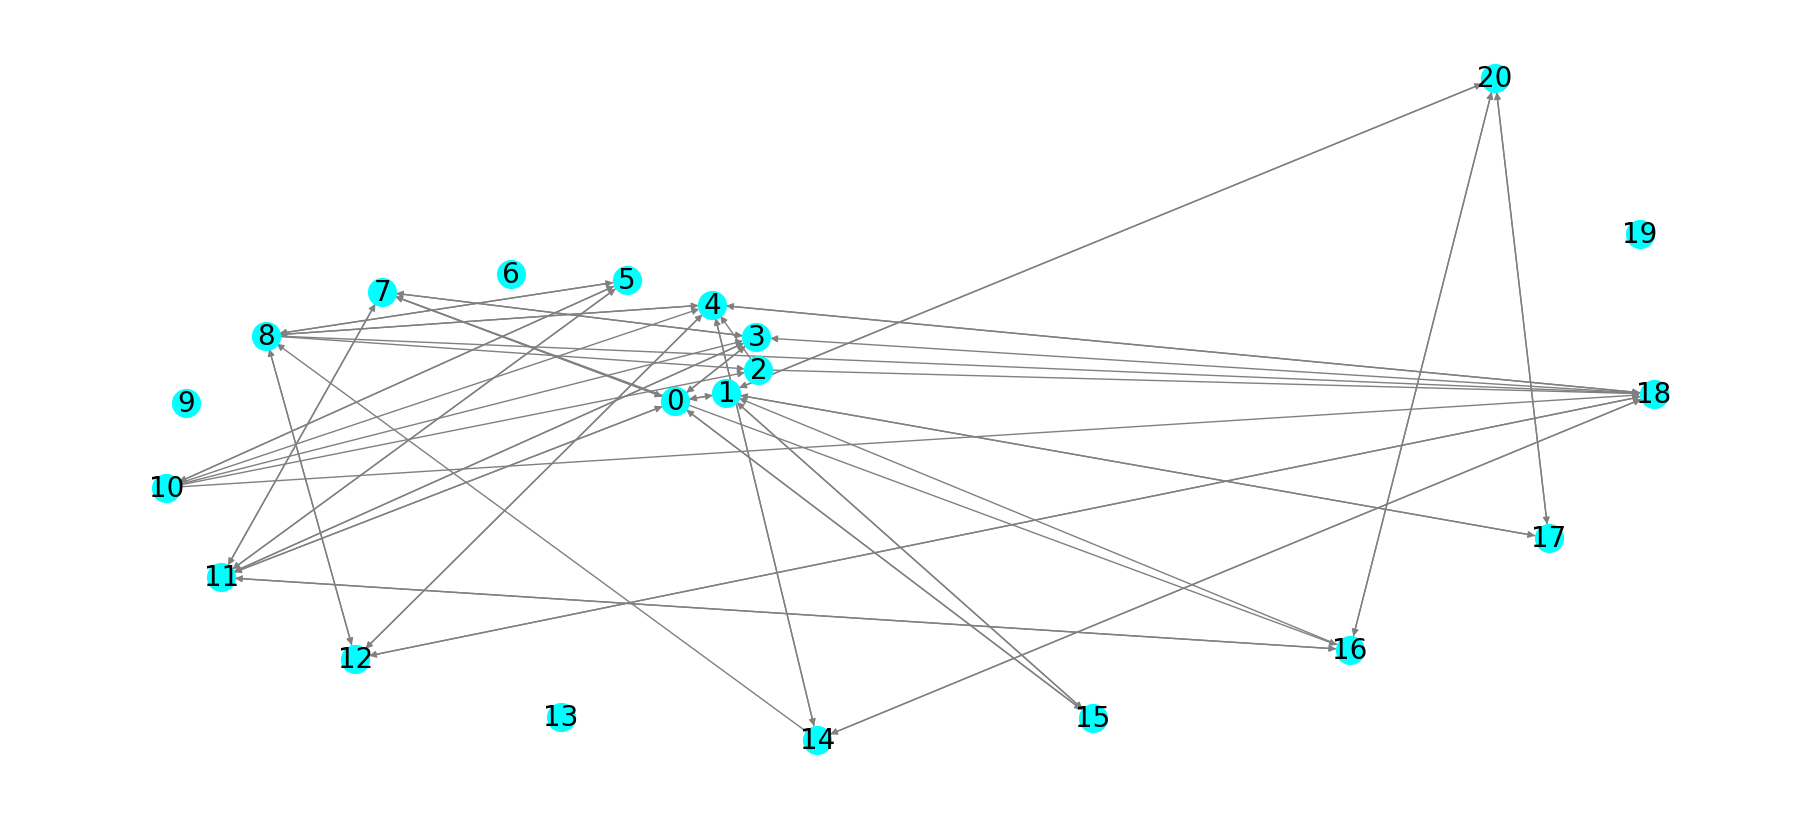

In [46]:
#used the spiral_layout function instead of the spring_layout function

pos = nx.spiral_layout(Tech_Friends_G)

plt.figure(figsize = (18,8) )
nx.draw(Tech_Friends_G, pos, node_color='cyan', node_size=400, edge_color='grey', with_labels=True, font_size = 20)


## TODO: Centrality in `Tech_Friend_G`
Use the functions/code above to find the nodes in our tech network with the highest of each centrality.

In [39]:
a = nx.degree_centrality(Tech_Friends_G)
d = nx.closeness_centrality(Tech_Friends_G)
#b = nx.eigenvector_centrality(Tech_Friends_G)
c = nx.betweenness_centrality(Tech_Friends_G)

print('The person with highest degree centrality is', max(a, key=lambda key: a[key]))
print('The person with highest closeness centrality is', max(d, key=lambda key: d[key]))
#print('The person with highest eigenvector centrality is', max(b, key=lambda key: b[key]))
print('The person with highest betweenness centrality is', max(c, key=lambda key: c[key]))

The person with highest degree centrality is 0
The person with highest closeness centrality is 3
The person with highest betweenness centrality is 11


## TODO: Find and plot the GN communities in the `Friend_Tech_G` network

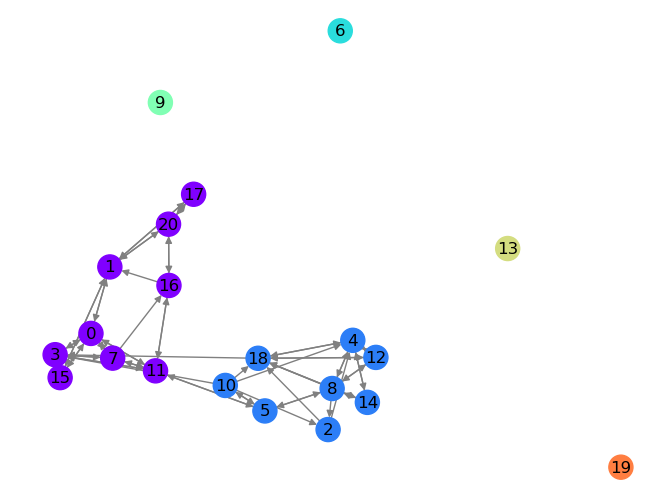

In [41]:
comm = nx.algorithms.community.girvan_newman(Tech_Friends_G)
gn_communities1 = tuple(sorted(c) for c in next(comm))


import matplotlib.cm as cmx
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=300, edge_color='grey', with_labels=True)
    plt.show()
    return


Plot_Comm(Tech_Friends_G, gn_communities1)


## TODO: What is the node with the lowest clustering coefficient? What is the average clustering coefficient?

In [42]:
clustering = nx.algorithms.clustering(Tech_Friends_G)
print('The node with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

average_cc = nx.algorithms.average_clustering(Tech_Friends_G)
print('The average clustering coefficient for the Karate network is ', average_cc)

The node with lowest clustering coefficient is 5
The average clustering coefficient for the Karate network is  0.42216490278336966


# Challenges:
- Look up the `networkx` documentation for the `sigma` function. 
    * How could we meaningfully use this function to inform us about _how_ a graph is connected?
    * Does this have any implications for disease spread? How about happiness? 
- Look up the `networkx` documentation for the `minimum_edge_cut` function. 
    * Use this function to find a different graph partitioning. Compare the results to those of Girvan-Newman
- Look up the `networkx` documentation for the `girvan_newman` function. 
    * Find `k=3` communities in the Karate network
- Look up the `graph_edit_distance` documentation.
    * Use this to think up a way to test for homophily in a network
        * Possible hint: you could use an Erdos Renyi graph or another random graph to compare.
        * _DISCLAIMER: I just came up with this question on-the-fly; I have no idea if there's a "good answer"_